## **US Airline Passenger Satisfaction**

by Abraham Adiguna Kurnia Tarra

---

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency


import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 30)

---

## **`Data Understanding and Cleaning`**

Dataset didapat dari Kaggle dataset dapat di akses pada link berikut:
[Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv)

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| ID  | Nomor unik masing-masing penumpang |
| Gender | Jenis Kelamin penumpang (Female (Perempuan), Male(Laki-laki))  |
| Customer Type | Tipe penumpang (Loyal Customer, disloyal customer)  |
| Age | Umur penumpang |
| Type of Travel | Tujuan penerbangan (Personal Travel,Business Travel) |
| Class | Kelas penerbangan (Business, Eco, Eco Plus) |
| Flight distance | Jarak penerbangan |
| Inflight wifi service | Level kepuasan terhadap wifi dalam penerbangan (0:Not Applicable;1-5) |
| Departure/Arrival time convenient | Level kepuasan terhadap keberangkatan atau kedatangan  |
| Ease of Online booking | Level kepuasan terhadap pemesanan tiket secara online  |
| Gate location | Level kepuasan terhadap lokasi pintu gerbang |
| Food and drink | Level kepuasan terhadap makanan dan minuman |
| Online boarding | Level kepuasan terhadap boarding online |
| Seat comfort | Level kepuasan terhadap kenyamanan kursi |
| Inflight entertainment | Level kepuasan terhadap hiburan dalam penerbangan |
| On-board service | Level kepuasan terhadap pelayanan on-board |
| Leg room service | Level kepuasan terhadap ruang kaki |
| Baggage handling | Level kepuasan terhadap penanganan bagasi |
| Check-in service | Level kepuasan terhadap pelayanan check-in |
| Inflight service | Level kepuasan terhadap pelayanan dalam penerbangan |
| Cleanliness | Level kepuasan terhadap kebersihan |
| Departure Delay in Minutes | Menit keterlambatan keberangkatan |
| Arrival Delay in Minutes | Menit keterlambatan kedatangan |
| Satisfaction | Tingkat Kepuasan Pelanggan(Satisfaction, neutral or dissatisfaction) |

In [11]:
df=pd.read_csv(r'H:\Airline Passenger Satisfaction\data\raw\Airline Data.csv')
df.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

**Check karakteristik dataset**

In [13]:
print(f'Jumlah baris dan kolom: {df.shape}')
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if (df[col].dtype == int or df[col].dtype == float) and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

Jumlah baris dan kolom: (103904, 25)


,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,Unnamed: 0,int64,0.000000,False,103904,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,int64,0.000000,False,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 8..."
2,Gender,object,0.000000,False,2,"[Male, Female]"
3,Customer Type,object,0.000000,False,2,"[Loyal Customer, disloyal Customer]"
4,Age,int64,0.000000,False,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3..."
5,Type of Travel,object,0.000000,False,2,"[Personal Travel, Business travel]"
6,Class,object,0.000000,False,3,"[Eco Plus, Business, Eco]"
7,Flight Distance,int64,0.000000,False,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8..."
8,Inflight wifi service,int64,0.000000,False,6,"[3, 2, 4, 1, 5, 0]"
9,Departure/Arrival time convenient,int64,0.000000,False,6,"[4, 2, 5, 3, 1, 0]"


**Missing Value**

<Axes: >

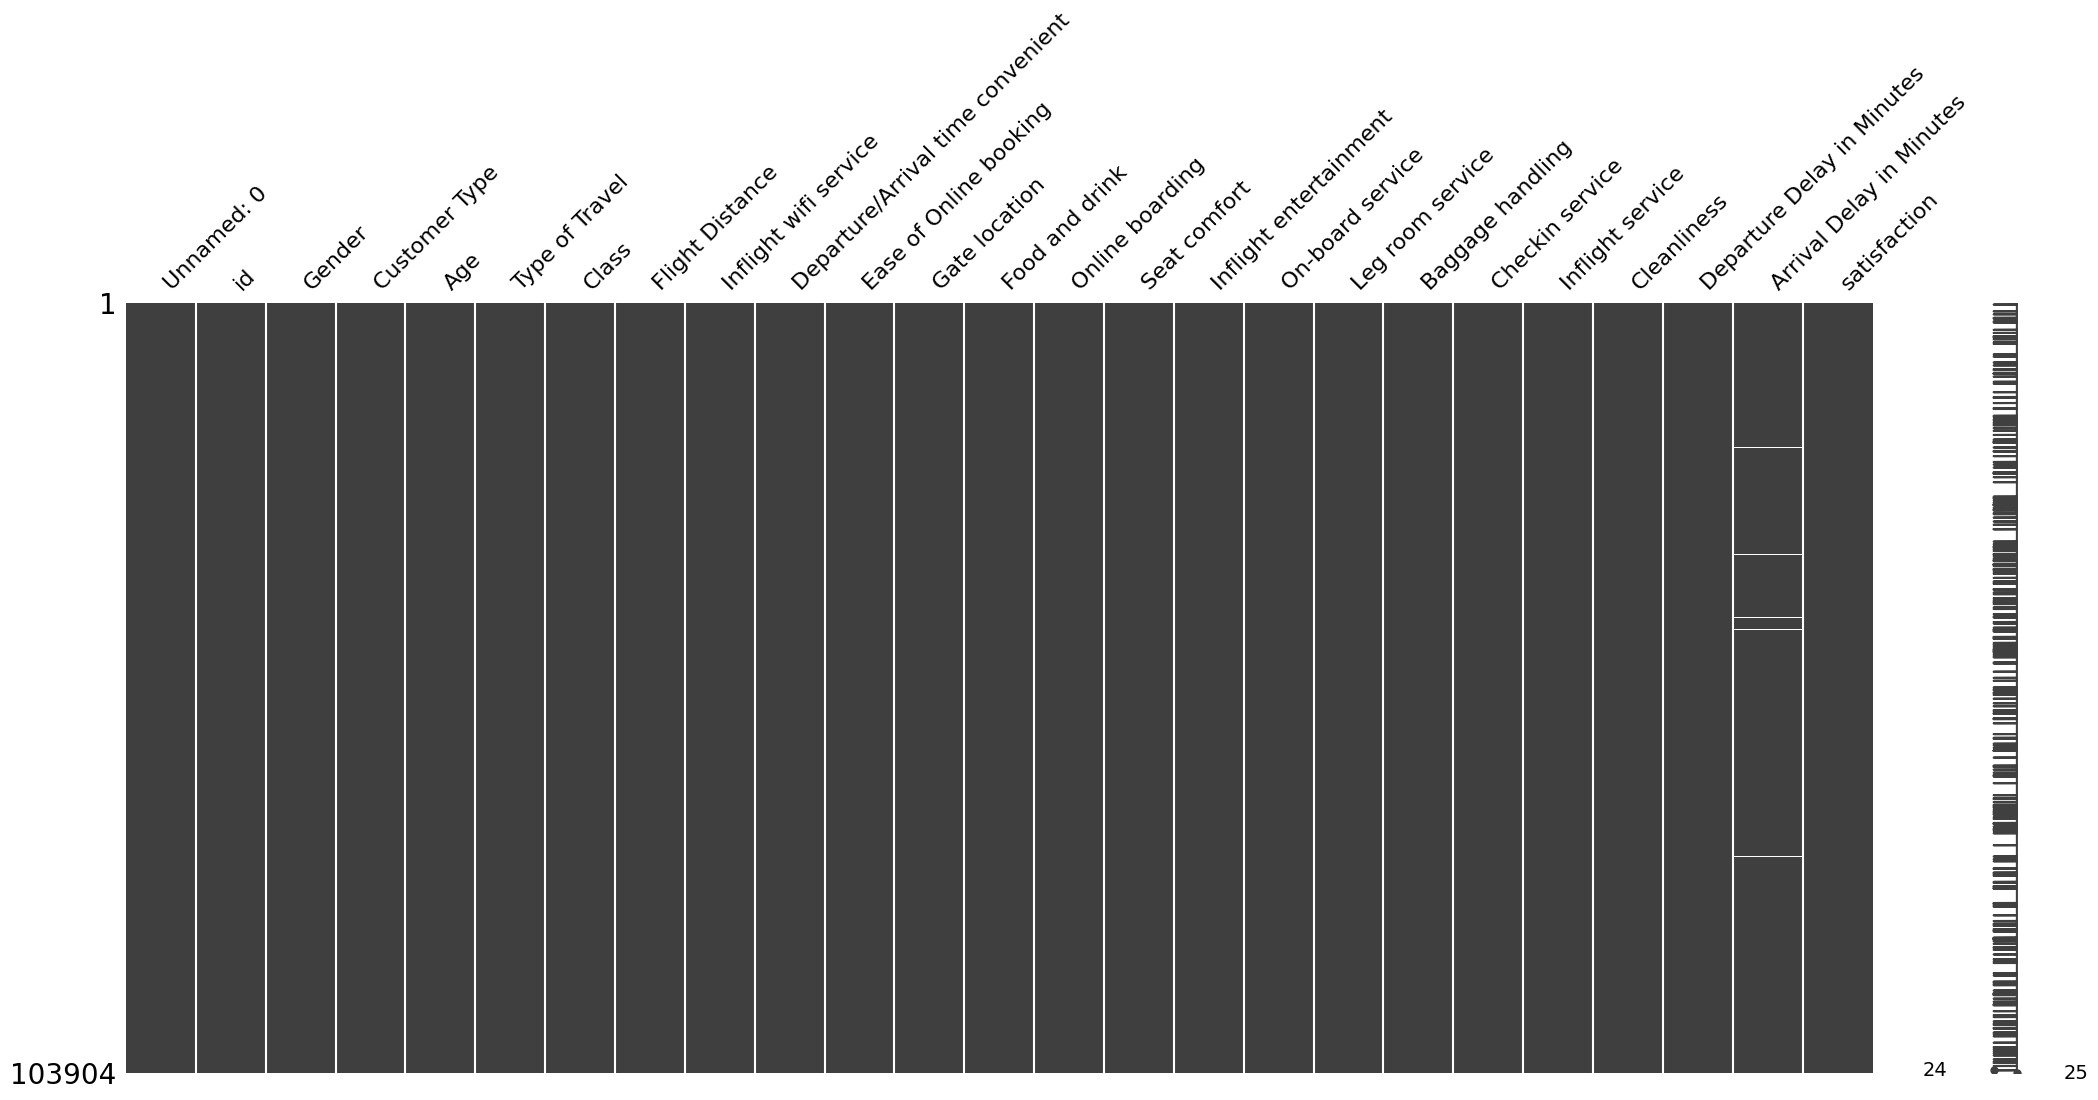

In [14]:
msn.matrix(df)

**Duplicated Data**

In [15]:
df['id'].duplicated().sum()

0

**Insight**:

- Banyak nama kolom yang menggunakan spasi, sehingga untuk menghindari adanya error, nama kolom akan diubah.
- Terdapat 0.2% missing value pada Arrival Delay in Minutes dan tipe datanya masi float 
- Tidak terdapat duplikat data dilihat dari kolom id. dicek berdasarkan id untuk memastikan semua penumpang mengisi sekali
- Rentang nilai pada service yang diberikan seharusnya bernilai 1(buruk) sampai dengan 5(baik). Nilai 0 yang diberikan diasumsikan bahwa responden tidak mengisi kolom service tersebut.
- Nilai kepuasan pelanggan hanya dibagi menjadi dua kategori, yaitu netral atau tidak puas, dan puas.

**Mengganti nama kolom**

In [16]:
df = df.rename(columns={'Unnamed: 0':'Unnamed: 0', 'id':'id','Gender':'Gender','Customer Type':'Customer_Type', 'Age':'Age','Type of Travel':'Type_of_Travel','Class':'Class','Flight Distance':'Flight_Distance','Inflight wifi service':'Inflight_Wifi_Service','Departure/Arrival time convenient':'Departure_Arrival_Time_Convenient','Ease of Online booking':'Ease_of_Online_Booking','Gate location':'Gate_Location','Food and drink':'Food_and_Drink','Online boarding':'Online_Boarding','Seat comfort':'Seat_Comfort','Inflight entertainment':'Inflight_Entertainment','On-board service':'On_Board_Service','Leg room service':'Leg_Room_Service','Baggage handling':'Baggage_Handling','Checkin service':'Checkin_Service','Inflight service':'Inflight_Service','Cleanliness':'Cleanliness','Departure Delay in Minutes':'Departure_Delay_in_Minutes','Arrival Delay in Minutes':'Arrival_Delay_in_Minutes','satisfaction':'Satisfaction'})
df.head()

,Unnamed: 0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## **Drop Columns** ##

Nilai unik dan jumlah baris pada kolom ID sama yaitu 103904, dan sudah dipastikan dengan fungsi duplikat sama dengan nol. Dapat disimpulkan bahwa tidak ada duplikat ID/data. Untuk analisa selanjutnya kolom ID dan kolom unnamed tidak diperlukan sehingga akan dihapus.

In [17]:
df.drop(['Unnamed: 0','id'], axis = 1,inplace= True)
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## **Handling Missing Value**

Terdapat 0.2% Missing Value pada Arrival_Delay_in_Minutes. Kita akan Handling dengan cara menganalisis korelasi antar tabel Departure_Delay_in_Minutes dan Arrival_Delay_in_Minutes

In [18]:
# Cek distribusi kolom
stats, pval=normaltest(df['Departure_Delay_in_Minutes'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


Karena distribusi tidak normal, sehingga dilakukan analisa korelasi dengan metode Spearman

In [19]:
df[['Arrival_Delay_in_Minutes','Departure_Delay_in_Minutes']].corr('spearman')

,Arrival_Delay_in_Minutes,Departure_Delay_in_Minutes
Arrival_Delay_in_Minutes,1.000000,0.740843
Departure_Delay_in_Minutes,0.740843,1.000000


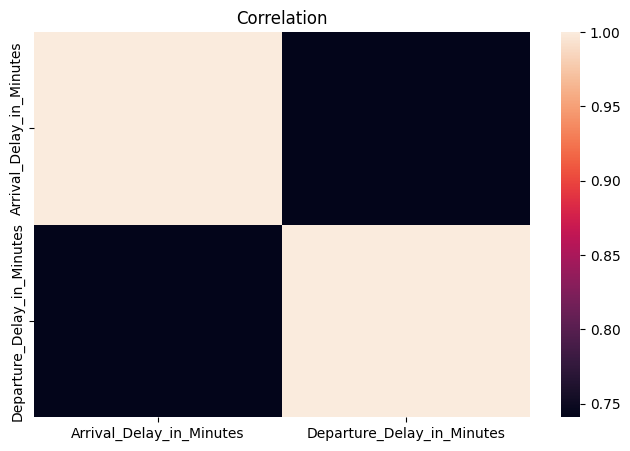

In [20]:
plt.figure(figsize = (8,5))
sns.heatmap(df[['Arrival_Delay_in_Minutes','Departure_Delay_in_Minutes']].corr('spearman'))
plt.title('Correlation')
plt.show()

Karena korelasi dua kolom tersebut cukup tinggi yaitu 74,1%, dan kolom keterlambatan kedatangan memiliki missing value, maka langkah yang dipilih untuk menangani missing value adalah dengan menghapus kolom Keterlambatan Kedatangan. Untuk faktor keterlambatan kedepannya akan dianalisa menggunakan kolom Keterlambatan Keberangkatan dengan asumsi jika keberangkatan terlambat maka kedatangan juga terlambat

In [21]:
df.drop(['Arrival_Delay_in_Minutes'],axis=1,inplace=True)
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Minutes,Satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied


In [22]:
df.query("Departure_Delay_in_Minutes >= 1400 ")

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Minutes,Satisfaction
83741,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592,neutral or dissatisfied


## **Outlier**

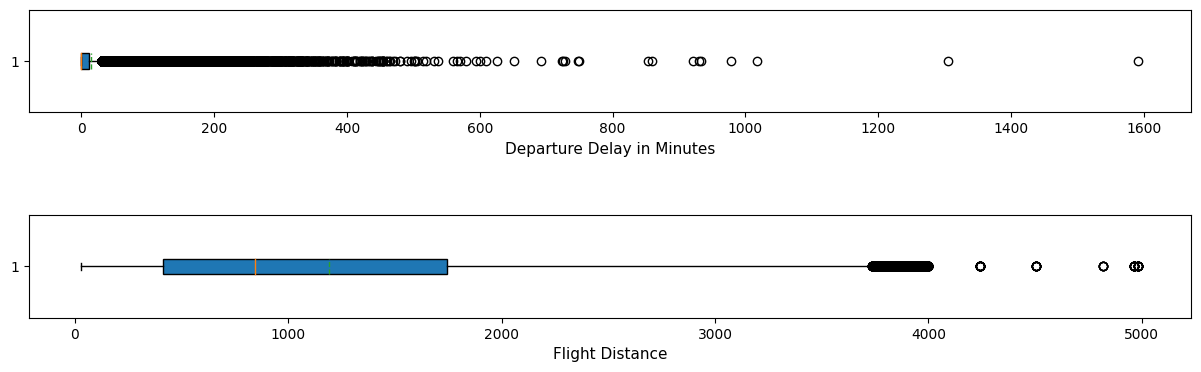

In [23]:
fig, axes = plt.subplots(2,figsize=(15, 4))
axes[0].boxplot(x=df['Departure_Delay_in_Minutes'], patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[1].boxplot(x=df['Flight_Distance'], patch_artist=True, meanline=True, showmeans=True, vert=False)

axes[0].set_xlabel("Departure Delay in Minutes", fontsize=11)
axes[1].set_xlabel("Flight Distance", fontsize=11)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=1)
plt.show()

### | **Depature Delay Outlier**

**Maksimum Keterlambatan**

In [24]:
hasilhari = 1592//1440
sisamenit = 1592%1440
hasiljam = sisamenit//60
hasilmenit = (sisamenit%60)

print(f'Waktu maksimum keterlambatan keberangkatan adalah {hasilhari} hari {hasiljam} jam {hasilmenit} menit')

Waktu maksimum keterlambatan keberangkatan adalah 1 hari 2 jam 32 menit


### | **Flight Distance Outlier**

In [25]:
Q1 = df['Flight_Distance'].quantile(0.25)
Q3 = df['Flight_Distance'].quantile(0.75)
IQR = Q3 - Q1
print(f'Nilai quantil satu adalah {Q1}')
print(f'Nilai quantil tiga adalah {Q3}')
print(f'Nilai selisih Q3 dan Q1 adalah {IQR}')

Nilai quantil satu adalah 414.0
Nilai quantil tiga adalah 1743.0
Nilai selisih Q3 dan Q1 adalah 1329.0


In [26]:
lower_bound =  Q1 - (1.5 * IQR)
upper_bound =  Q3 + (1.5 * IQR)

condition = (df['Flight_Distance']< lower_bound) | (df['Flight_Distance']> upper_bound)

outlier = df.loc[condition, 'Flight_Distance'].count()

PersentaseOutlier = outlier/df['Flight_Distance'].count()*100
print(f'''Nilai batas bawah jarak tempuh adalah {lower_bound} (dalam hal ini jarak tempuh tidak mungkin negatif, dianggap 0), \n dan nilai batas atas jarak tempuh adalah {upper_bound} miles, terdapat {outlier} data yang menyimpang dari data biasanya, yaitu sebanyak {round(PersentaseOutlier,2)}%''')

Nilai batas bawah jarak tempuh adalah -1579.5 (dalam hal ini jarak tempuh tidak mungkin negatif, dianggap 0), 
 dan nilai batas atas jarak tempuh adalah 3736.5 miles, terdapat 2291 data yang menyimpang dari data biasanya, yaitu sebanyak 2.2%


In [27]:
df.query("Flight_Distance > 3736")

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Minutes,Satisfaction
80,Male,Loyal Customer,26,Business travel,Business,3960,1,1,1,1,4,4,4,4,4,2,5,4,4,4,45,satisfied
173,Male,Loyal Customer,52,Business travel,Business,3747,5,5,5,5,2,4,5,4,4,4,4,5,4,5,24,satisfied
201,Female,Loyal Customer,43,Business travel,Business,3854,5,5,5,5,5,4,4,5,5,5,5,5,5,3,0,satisfied
215,Female,Loyal Customer,38,Business travel,Business,3753,2,2,2,2,1,1,5,4,4,4,4,4,4,1,0,satisfied
379,Male,Loyal Customer,46,Business travel,Business,3995,4,4,4,4,3,4,4,5,5,5,5,5,5,4,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103565,Female,Loyal Customer,59,Business travel,Business,3881,2,2,2,2,4,5,5,2,2,2,2,5,2,3,0,satisfied
103648,Male,Loyal Customer,43,Business travel,Business,3890,4,4,2,4,4,2,1,5,5,5,5,2,5,2,0,satisfied
103727,Female,Loyal Customer,25,Business travel,Business,3990,3,3,2,2,3,3,3,3,1,4,2,4,3,3,0,neutral or dissatisfied
103865,Male,Loyal Customer,35,Business travel,Business,3795,5,5,5,5,4,5,4,2,2,2,2,2,2,1,0,satisfied


**Insight** :
- Pada kolom depature delay Dari boxplot diatas, dapat dilihat banyaknya outlier. Akan tetapi hal ini memungkinkan untuk terjadi, contohnya untuk data maximum pada Keterlambatan Keberangkatan adalah 1 hari 2 jam 32 menit, dimana data tersebut masuk akal untuk terjadi seperti adanya reschedule pada pesawat.
- pada kolom flight Distance terdapat 2.2% data outlier atau sebanyak 2291 baris. baris yang memiliki Flight_Distance > 3736 akan kita drop 

In [28]:
df = df.drop(df[df.Flight_Distance > 3736].index)

<Axes: >

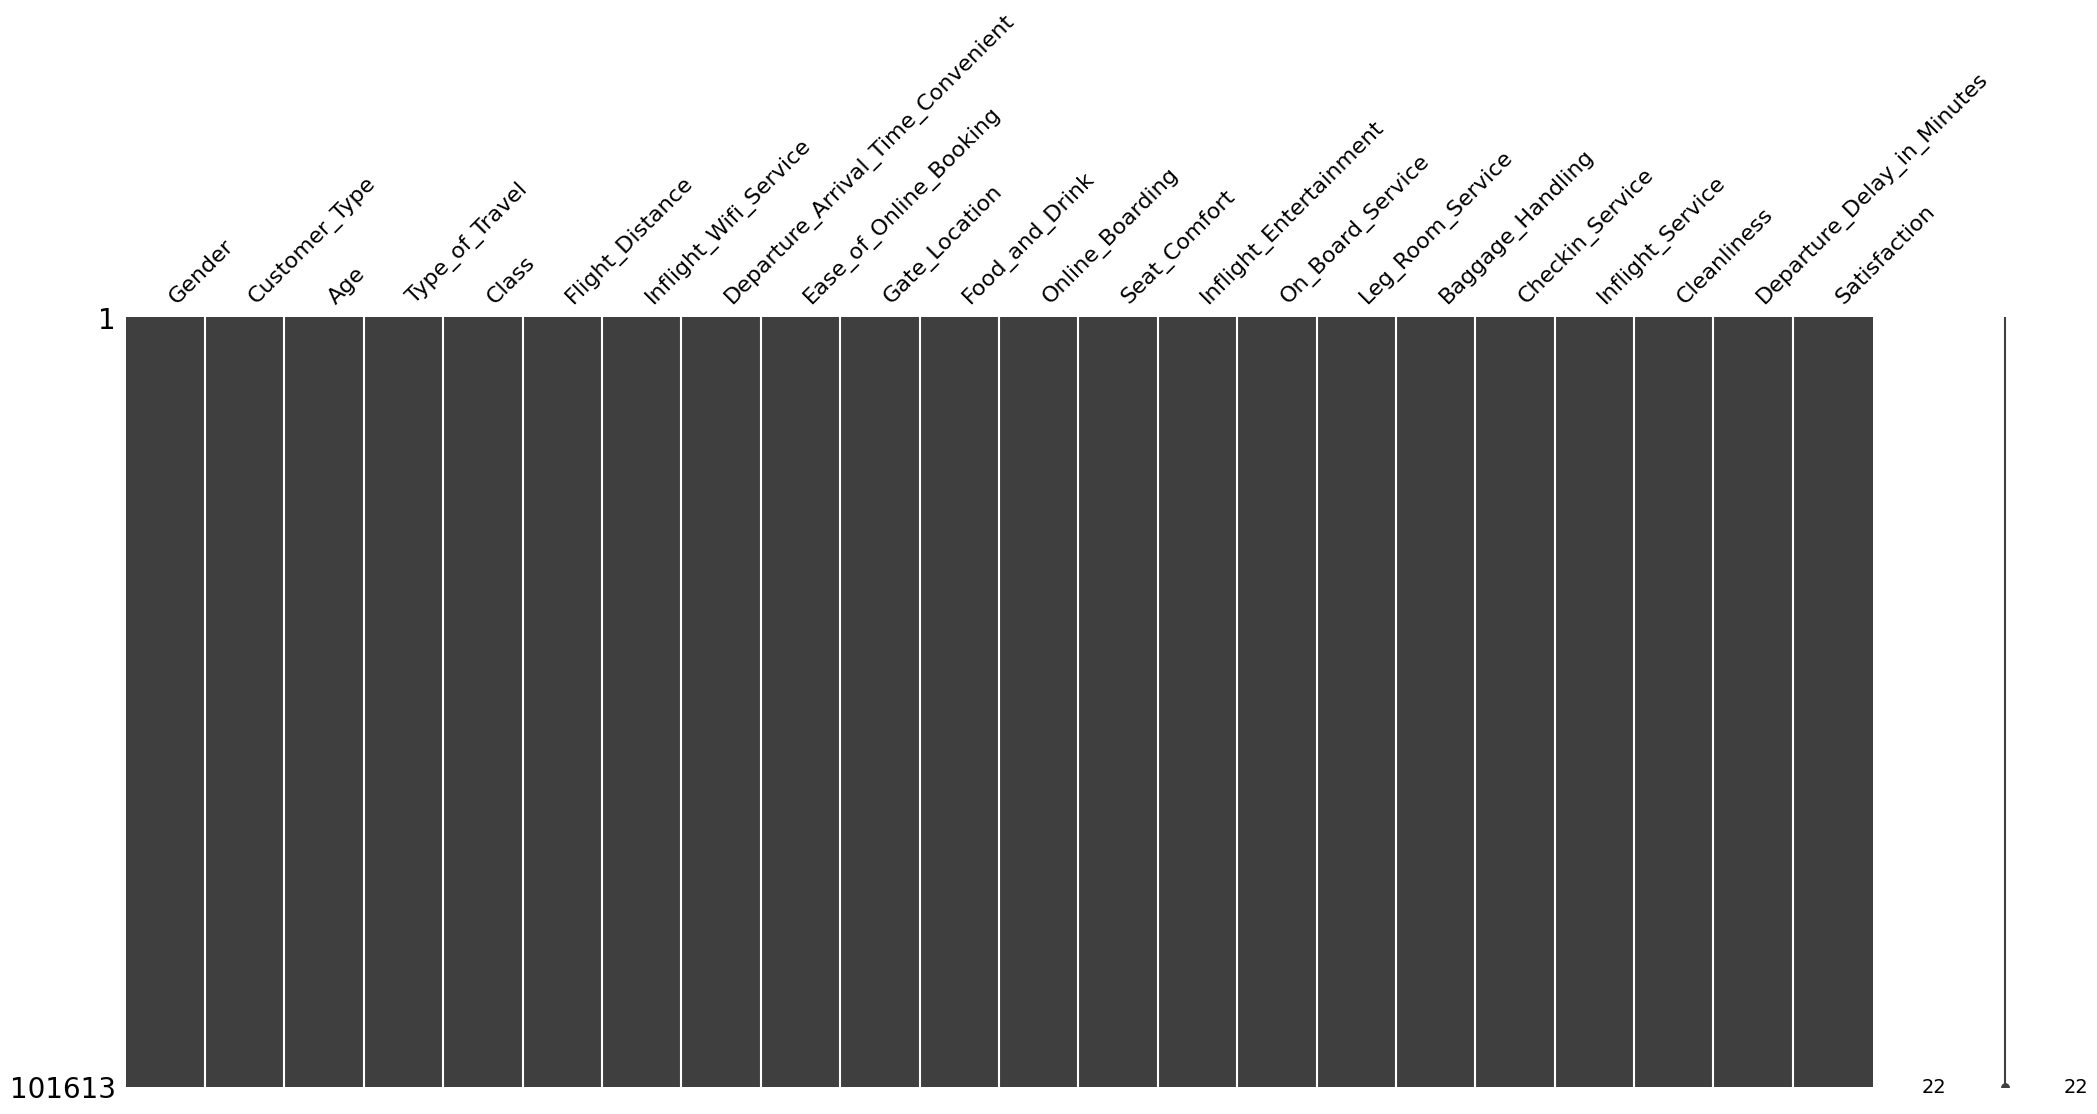

In [29]:
msn.matrix(df)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101613 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             101613 non-null  object
 1   Customer_Type                      101613 non-null  object
 2   Age                                101613 non-null  int64 
 3   Type_of_Travel                     101613 non-null  object
 4   Class                              101613 non-null  object
 5   Flight_Distance                    101613 non-null  int64 
 6   Inflight_Wifi_Service              101613 non-null  int64 
 7   Departure_Arrival_Time_Convenient  101613 non-null  int64 
 8   Ease_of_Online_Booking             101613 non-null  int64 
 9   Gate_Location                      101613 non-null  int64 
 10  Food_and_Drink                     101613 non-null  int64 
 11  Online_Boarding                    101613 non-null  

----

Data yang sudah bersih akan disimpan dalam format csv dan excel

In [31]:
# df.to_excel(r'H:\Airline Passenger Satisfaction\data\processed\Airline Data Clean excel.xlsx', index= False)
# df.to_csv(r'H:\Airline Passenger Satisfaction\data\processed\Airline Data Clean CSV.csv', index= False)